In [1]:
import os
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.manifold import TSNE
from glob import glob

from nlp_processing import LemmaTokenizer, get_eigenvectors, reduce_nlp_data, combine_scale, plot_tsne

In [2]:
for counter, path in enumerate(glob('processing_outputs/*.pkl')):
    if counter == 0:
        total_df = pd.read_pickle(path)
    else:
        total_df = total_df.append(pd.read_pickle(path))
        
numeric_df = total_df[['per_video', 'zero_median',
                       'zero_var', 'rmse_median',
                       'rmse_var', 'spec_median', 'spec_var']]
total_df.label.value_counts()

1    2962
0    1937
Name: label, dtype: int64

In [3]:
total_df.to_pickle('video_df.pkl')

In [4]:
ssX = StandardScaler()
LT = LemmaTokenizer()
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300, random_state = 2)
additional_stopwords = ['like', 'lot', 'did', 'thing', 'just', 'okay',
                       've', 'don', 'really', 'wa', 'know', 'people', 
                       'feel', 'yeah']
additional_tokens = [LT(word)[0] for word in additional_stopwords]
# Countvectorizer ended up being more descriptive than tfidf
cv = CountVectorizer(stop_words =
                     ENGLISH_STOP_WORDS.union(additional_tokens),
                     ngram_range = (1,2), max_df = 0.7, min_df = 5,
                      tokenizer = LemmaTokenizer())
tfidf = TfidfVectorizer(stop_words =
                     ENGLISH_STOP_WORDS.union(additional_tokens),
                     ngram_range = (1,2), max_df = 0.7, min_df = 5,
                      tokenizer = LemmaTokenizer())

[(0, '0.054*"oh" + 0.020*"god" + 0.017*"oh god" + 0.017*"going" + 0.016*"good" + 0.015*"come" + 0.014*"let" + 0.013*"got" + 0.012*"day" + 0.012*"want"'), (1, '0.040*"sex" + 0.015*"sexual" + 0.013*"think" + 0.013*"video" + 0.010*"way" + 0.010*"having" + 0.010*"time" + 0.008*"different" + 0.007*"experience" + 0.007*"want"'), (2, '0.014*"ring" + 0.013*"cock" + 0.012*"toy" + 0.011*"little" + 0.010*"song" + 0.010*"want" + 0.009*"kind" + 0.009*"hair" + 0.008*"good" + 0.008*"dick"'), (3, '0.017*"time" + 0.015*"right" + 0.015*"gonna" + 0.015*"think" + 0.012*"make" + 0.011*"want" + 0.011*"going" + 0.010*"sure" + 0.009*"mean" + 0.008*"fucking"'), (4, '0.021*"want" + 0.013*"body" + 0.012*"think" + 0.010*"friend" + 0.010*"make" + 0.009*"talk" + 0.009*"way" + 0.009*"good" + 0.008*"going" + 0.008*"stuff"'), (5, '0.032*"love" + 0.019*"girl" + 0.017*"think" + 0.012*"year" + 0.012*"want" + 0.010*"school" + 0.010*"gonna" + 0.009*"mom" + 0.009*"guy" + 0.009*"trans"')]
[t-SNE] Computing 151 nearest neighb

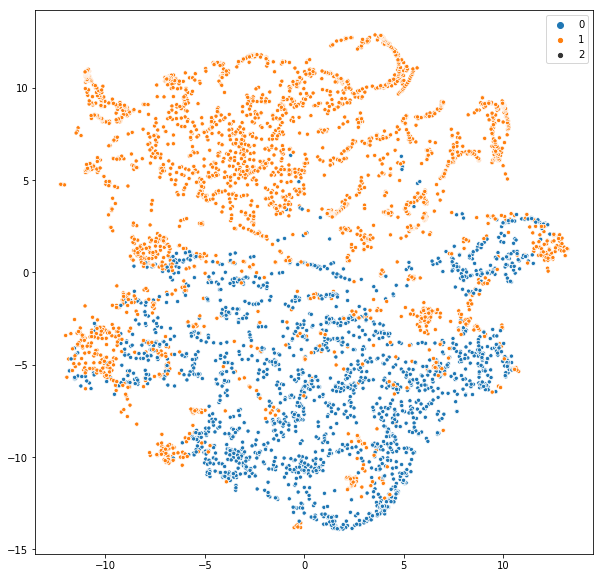

In [5]:
lda_cv, lda_cv_data = reduce_nlp_data(cv, total_df['text'].values, 6, 'lda')
ssX_lda_cv, scaled_lda_cv_data = combine_scale(lda_cv_data, numeric_df.values, ssX)
plot_tsne(tsne, scaled_lda_cv_data, total_df['label'].values)

[(0, '0.020*"oh" + 0.020*"god" + 0.020*"oh god" + 0.015*"google" + 0.012*"fucking" + 0.010*"come" + 0.010*"going" + 0.009*"fuck" + 0.009*"miss" + 0.008*"hey"'), (1, '0.011*"song" + 0.010*"sex" + 0.006*"sexual" + 0.006*"way" + 0.006*"little" + 0.005*"body" + 0.005*"bit" + 0.005*"bed" + 0.005*"little bit" + 0.005*"ll"'), (2, '0.024*"youtube" + 0.015*"good" + 0.009*"facebook" + 0.009*"game" + 0.009*"com" + 0.009*"episode" + 0.007*"50" + 0.007*"class" + 0.006*"paper" + 0.006*"harder"'), (3, '0.008*"think" + 0.008*"want" + 0.008*"time" + 0.007*"right" + 0.006*"make" + 0.006*"got" + 0.006*"going" + 0.006*"gonna" + 0.006*"good" + 0.005*"let"'), (4, '0.015*"brother" + 0.010*"music" + 0.010*"car" + 0.010*"want" + 0.009*"girl" + 0.007*"daddy" + 0.006*"john" + 0.006*"wrong" + 0.006*"surprise" + 0.006*"sister"'), (5, '0.042*"oh" + 0.019*"weather" + 0.018*"baby" + 0.015*"mommy" + 0.012*"hahaha" + 0.010*"mom" + 0.009*"school" + 0.008*"phone" + 0.008*"chicago" + 0.007*"taste"')]
[t-SNE] Computing 151

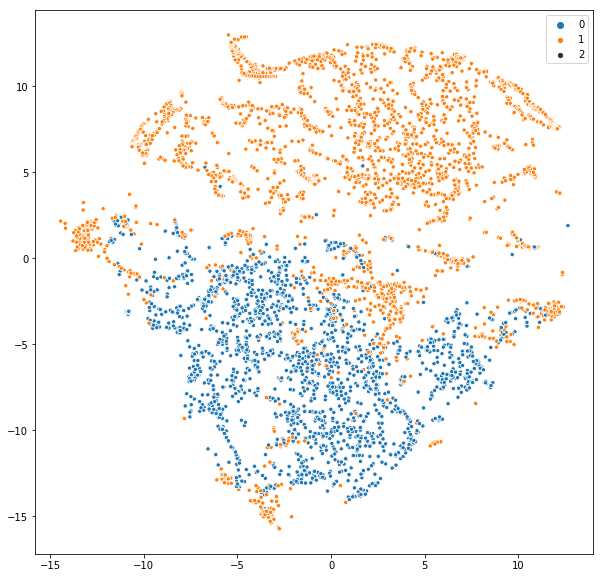

In [30]:
lda_tfidf, lda_tfidf_data = reduce_nlp_data(tfidf, total_df['text'].values, 6, 'lda')
ssX_lda_tfidf, scaled_lda_tfidf_data = combine_scale(lda_tfidf_data, numeric_df.values, ssX)
plot_tsne(tsne, scaled_lda_tfidf_data, total_df['label'].values)

0: ['want', 'think', 'sex', 'time', 'oh', 'make', 'gonna', 'going', 'right', 'way']
1: ['sex', 'sexual', 'having', 'having sex', 'period', 'work', 'shame', 'body', 'asexual', 'period sex']
2: ['want', 'make', 'talk', 'going', 'video', 'gonna', 'sure', 'way', 'make sure', 'right']
3: ['think', 'way', 'relationship', 'kind', 'year', 'didn', 'gonna', 'love', 'u', 'mean']
4: ['think', 'want', 'oh', 'god', 'oh god', 'sex', 'period', 'relationship', 'talk', 'think want']
5: ['time', 'want', 'think', 'going', 'period', 'long', 'relationship', 'didn', 'year', 'life']
6: ['gonna', 'going', 'sex', 'look', 'think', 'little', 'rope', 'today', 'oh', 'right']
7: ['going', 'way', 'come', 'kind', 'sexual', 'good', 'right', 'need', 'sure', 'hand']
8: ['make', 'right', 'sure', 'think', 'ring', 'make sure', 'cock', 'way', 'cock ring', 'doesn']
9: ['right', 'kind', 'got', 'sexual', 'mean', 'didn', 'experience', 'look', 'say', 'friend']
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 4899 sample

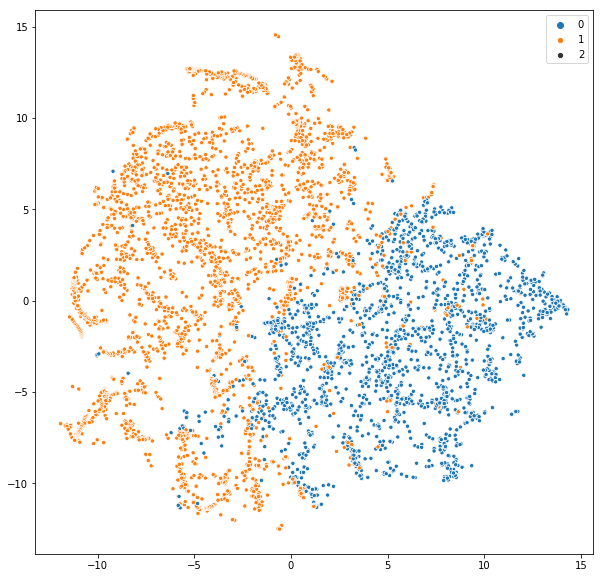

In [31]:
svd_cv, svd_cv_data = nlp_data(cv, total_df['text'].values, 10, 'svd')
ssX_svd_cv, scaled_svd_cv_data = combine_scale(svd_cv_data, numeric_df.values, ssX)
plot_tsne(tsne, scaled_svd_cv_data, total_df['label'].values)

0: ['oh', 'want', 'think', 'time', 'god', 'good', 'going', 'oh god', 'right', 'sex']
1: ['oh', 'oh god', 'god', 'god oh', 'oh oh', 'baby', 'oh gosh', 'gosh', 'oh yes', 'll try']
2: ['want', 'sex', 'talk', 'oh', 'sexual', 'want want', 'video', 'toy', 'period', 'god']
3: ['want', 'good', 'going', 'pussy', 'come', 'right', 'daddy', 'music', 'look', 'nice']
4: ['music', 'think', 'right', 'gonna', 'applause', 'daddy', 'music applause', 'excited', 'got', 'today']
5: ['music', 'good', 'sex', 'want', 'applause', 'sexual', 'music applause', 'oh god', 'having', 'god']
6: ['going', 'god', 'oh god', 'music', 'sex', 'good', 'time', 'today', 'come', 'rope']
7: ['god', 'oh god', 'think', 'love', 'want', 'friend', 'time', 'didn', 'good', 'video']
8: ['come', 'god', 'oh god', 'little', 'girl', 'right', 'sex', 'bit', 'daddy', 'little bit']
9: ['come', 'think', 'right', 'yes', 'good', 'got', 'friend', 'wanted', 'time', 'year']
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 4899 samples in 0.0

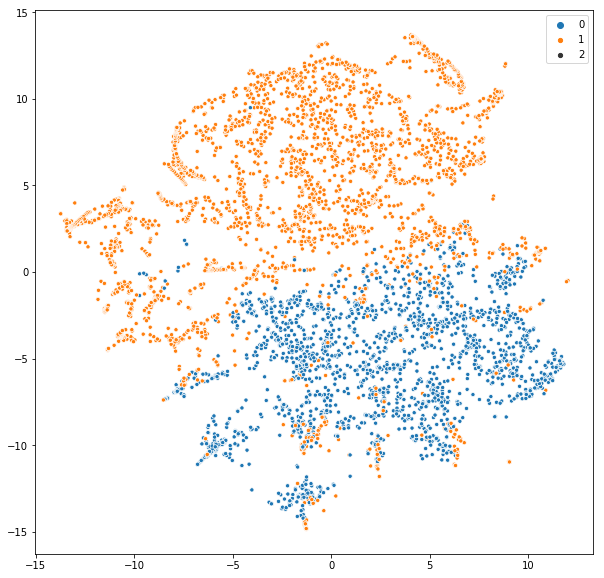

In [32]:
svd_tfidf, svd_tfidf_data = nlp_data(tfidf, total_df['text'].values, 10, 'svd')
ssX_svd_tfidf, scaled_svd_tfidf_data = combine_scale(svd_tfidf_data, numeric_df.values, ssX)
plot_tsne(tsne, scaled_svd_tfidf_data, total_df['label'].values)

0: ['make', 'sure', 'make sure', 'body', 'ring', 'way', 'cock', 'cock ring', 'work', 'doesn']
1: ['sex', 'sexual', 'having', 'period', 'having sex', 'work', 'ha', 'talk', 'different', 'shame']
2: ['oh', 'god', 'oh god', 'let', 'yes', 'look', 'video', 'hey', 'thank', 'god oh']
3: ['think', 'relationship', 'way', 'didn', 'best', 'friend', 'u', 'maybe', 'mean', 'partner']
4: ['want', 'video', 'talk', 'say', 'need', 'want talk', 'want want', 'll', 'able', 'life']
5: ['time', 'good', 'day', 'year', 'friend', 'long', 'didn', 'got', 'life', 'great']
6: ['gonna', 'today', 'said', 'little', 'day', 'tell', 'music', 'tie', 'look', 'bite']
7: ['going', 'come', 'rope', 'way', 'end', 'making', 'hand', 'nice', 'need', 'today']
8: ['love', 'trans', 'body', 'say', 'friend', 'ha', 'life', 'year', 'said', 'best']
9: ['right', 'kind', 'got', 'mean', 'look', 'little', 'way', 'good', 'need', 'let']
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 4899 samples in 0.027s...
[t-SNE] Computed neighbor

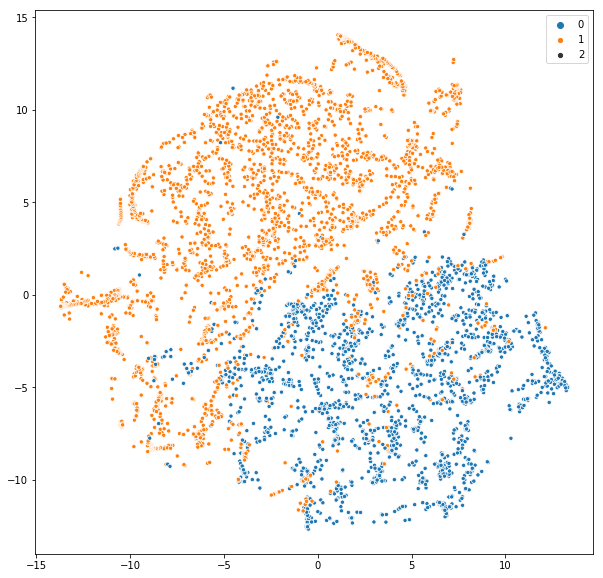

In [33]:
nmf_cv, nmf_cv_data = nlp_data(cv, total_df['text'].values, 10, 'nmf')
ssX_nmf_cv, scaled_nmf_cv_data = combine_scale(nmf_cv_data, numeric_df.values, ssX)
plot_tsne(tsne, scaled_nmf_cv_data, total_df['label'].values)